In [ ]:
# transfer learning using resnet 50.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf  #used for building and training machine learning models, especially neural networks
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import ResNet50  # ResNet50 is a deep convolutional neural network architecture known for its excellent performance on image classification tasks.
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # which is used for data augmentation and preprocessing of image data.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import clone_model

In [ ]:
# dataset paths
train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/test'

In [ ]:
# Set the image size and batch size  for data preprocessing and training.
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
# data generators are created to preprocess and augment the training and testing data.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 18 images belonging to 4 classes.


In [ ]:
# Load the pre-trained ResNet-50 model without the top classification layers
base_model = ResNet50(
    include_top=False,
    weights='imagenet', # This is significant because ResNet-50 is a powerful feature extractor that has been trained on a large dataset
    input_shape=(224, 224, 3)  #  input images to have a size of 224x224 pixels with 3 color channels (RGB).
)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
#  Freezing means that during the training of your entire model, the weights and parameters of these frozen layers will remain unchanged

In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)  # Flattening the previous layer's output , means transforming a multi-dimensional array
x = Dense(256, activation='relu')(x) # Adding a dense layer with 256 neurons and ReLU activation for learning.
output = Dense(len(training_set.class_indices), activation='softmax')(x)  # Adding an output layer with as many neurons as classes, using softmax activation for classification.

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Specifies how the model adjusts its parameters during training using the Adam optimization algorithm with a learning rate of 0.001.
    loss='categorical_crossentropy', #  Defines the type of error measurement the model uses, which is suitable for multi-class classification tasks.
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,                  # the number of times the model will go through the entire training dataset,the model will be trained for 20 epochs.
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 1003s 16s/step - loss: 2.7957 - accuracy: 0.4111 - val_loss: 1.3001 - val_accuracy: 0.3333
Epoch 2/20
61/61 [==============================] - 35s 578ms/step - loss: 1.1965 - accuracy: 0.5233 - val_loss: 1.2350 - val_accuracy: 0.4444
Epoch 3/20
61/61 [==============================] - 36s 595ms/step - loss: 1.1640 - accuracy: 0.5730 - val_loss: 1.1681 - val_accuracy: 0.5556
Epoch 4/20
61/61 [==============================] - 36s 587ms/step - loss: 0.9950 - accuracy: 0.6094 - val_loss: 1.0001 - val_accuracy: 0.5556
Epoch 5/20
61/61 [==============================] - 36s 591ms/step - loss: 0.9270 - accuracy: 0.6443 - val_loss: 0.8443 - val_accuracy: 0.6667
Epoch 6/20
61/61 [==============================] - 35s 571ms/step - loss: 0.8496 - accuracy: 0.6581 - val_loss: 0.8803 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 36s 587ms/step - loss: 0.7694 - accuracy: 0.6884 - val_loss: 0.7865 - val_accuracy: 0.7222

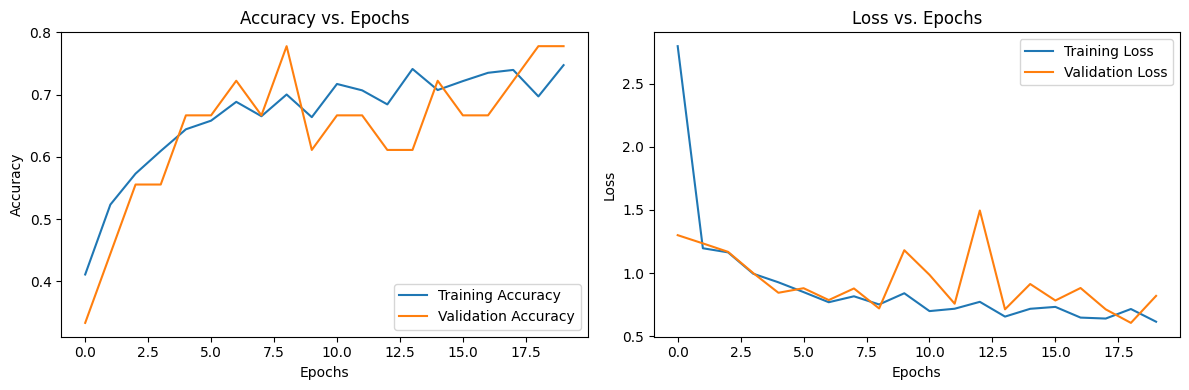

1/1 [==============================] - 2s 2s/step - loss: 0.8196 - accuracy: 0.7778
Final Test Accuracy: 77.78%


In [ ]:
import matplotlib.pyplot as plt

# Training history contains information about accuracy and loss during training
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate final accuracy on test set
test_loss, test_accuracy = model.evaluate(test_set)
print(f'Final Test Accuracy: {test_accuracy * 100:.2f}%')


In [ ]:
# transfer learning using inception

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define your dataset paths
train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/test'

In [ ]:
# Set the image size and batch size
IMAGE_SIZE = (299, 299)  # InceptionV3 requires input size (299, 299)
BATCH_SIZE = 32

In [ ]:
# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 18 images belonging to 4 classes.


In [ ]:
# Load the pre-trained InceptionV3 model without the top classification layers
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(299, 299, 3)  # Input size is (299, 299) for InceptionV3
)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(len(training_set.class_indices), activation='softmax')(x)


In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 67s 986ms/step - loss: 9.3316 - accuracy: 0.7212 - val_loss: 1.0672 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 54s 877ms/step - loss: 0.6839 - accuracy: 0.9016 - val_loss: 0.6537 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 54s 891ms/step - loss: 0.4013 - accuracy: 0.9216 - val_loss: 0.4280 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 54s 893ms/step - loss: 0.2220 - accuracy: 0.9482 - val_loss: 0.5149 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 54s 889ms/step - loss: 0.2082 - accuracy: 0.9431 - val_loss: 1.2953 - val_accuracy: 0.7778
Epoch 6/20
61/61 [==============================] - 53s 870ms/step - loss: 0.1422 - accuracy: 0.9626 - val_loss: 0.3836 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 54s 884ms/step - loss: 0.1074 - accuracy: 0.9692 - val_loss: 0.2296 - val_accuracy: 0.9444

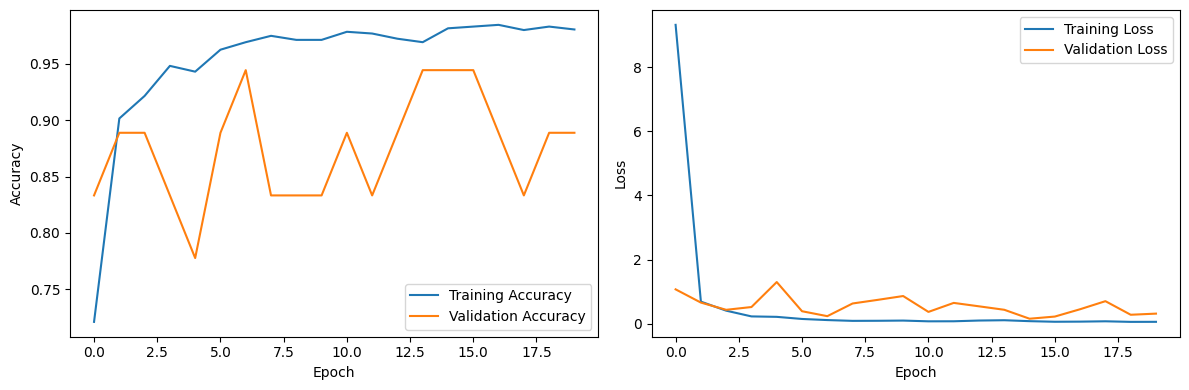

Final Validation Accuracy: 0.8889


In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and print final accuracy
final_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_accuracy:.4f}")

In [ ]:
# predefined model using vgg19

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define your dataset paths
train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/test'

In [ ]:
# Set the image size and batch size
IMAGE_SIZE = (224, 224)  # VGG19 requires input size (224, 224)
BATCH_SIZE = 32

In [ ]:
# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 18 images belonging to 4 classes.


In [ ]:
# Load the pre-trained VGG19 model without the top classification layers
base_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)  # Input size is (224, 224) for VGG19
)

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(len(training_set.class_indices), activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 49s 695ms/step - loss: 2.2083 - accuracy: 0.6684 - val_loss: 0.2744 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 34s 561ms/step - loss: 0.3238 - accuracy: 0.8719 - val_loss: 0.1480 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 36s 584ms/step - loss: 0.2809 - accuracy: 0.8944 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 35s 581ms/step - loss: 0.3120 - accuracy: 0.8883 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 34s 557ms/step - loss: 0.1873 - accuracy: 0.9329 - val_loss: 0.1427 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 34s 562ms/step - loss: 0.1304 - accuracy: 0.9518 - val_loss: 0.1189 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 34s 557ms/step - loss: 0.1632 - accuracy: 0.9400 - val_loss: 0.3779 - val_accuracy: 0.8889

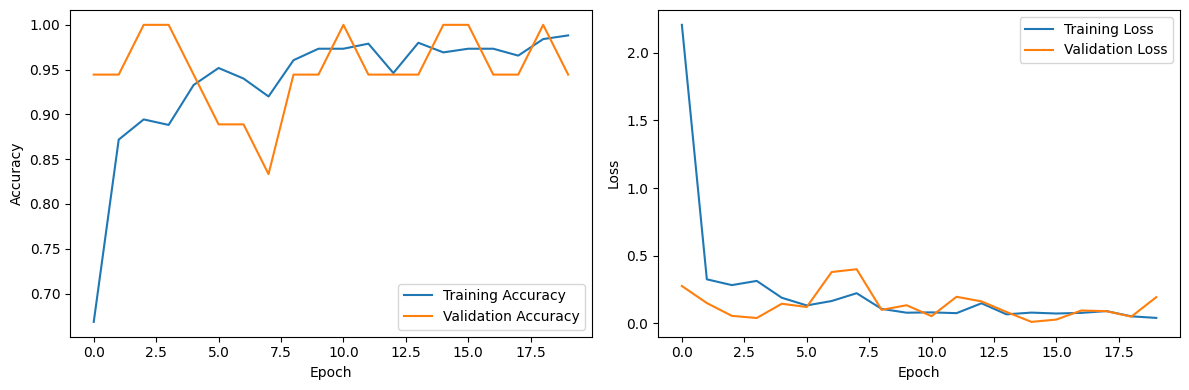

Final Training Accuracy: 0.9882
Final Validation Accuracy: 0.9444


In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and print final accuracy
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")


In [ ]:
# ensemble learning

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Load the saved models
resnet_model = tf.keras.models.load_model('resnet_model.h5')
inceptionv3_model = tf.keras.models.load_model('inceptionv3_model.h5')
vgg19_model = tf.keras.models.load_model('vgg19_model.h5')

# Prepare the validation data
valid_path = '/content/drive/MyDrive/dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)
valid_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get the ground truth labels
y_true = valid_set.classes

# Predict using the individual models
resnet_predictions = resnet_model.predict(valid_set)
inceptionv3_predictions = inceptionv3_model.predict(valid_set)
vgg19_predictions = vgg19_model.predict(valid_set)

# Combine the predictions
stacked_predictions = np.column_stack((resnet_predictions, inceptionv3_predictions, vgg19_predictions))

# Create a final model (e.g., logistic regression) to make predictions on stacked data
final_model = LogisticRegression()

# Fit the final model on stacked predictions
final_model.fit(stacked_predictions, y_true)

# Predict using the final model
ensemble_predictions = final_model.predict(stacked_predictions)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_true, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Found 18 images belonging to 4 classes.
1/1 [==============================] - 2s 2s/step
Ensemble Accuracy: 0.9444444444444444


In [ ]:
# Evaluate individual models
models = [resnet_model, inceptionv3_model, vgg19_model]
model_names = ["ResNet50", "InceptionV3", "VGG19"]

for i, model in enumerate(models):
    predictions = model.predict(valid_set)
    y_true = valid_set.classes
    y_pred = np.argmax(predictions, axis=1)

    # Calculate and print classification report
    report = classification_report(y_true, y_pred, target_names=valid_set.class_indices.keys())
    print(f"Metrics for {model_names[i]}:\n{report}")

# Evaluate the stacking ensemble
stacked_predictions = final_model.predict(stacked_predictions)  # Predict using the final model
stacked_accuracy = accuracy_score(y_true, stacked_predictions)
print(f"Stacking Ensemble Accuracy: {stacked_accuracy}")


1/1 [==============================] - 1s 1s/step
Metrics for ResNet50:
                       precision    recall  f1-score   support

 diseased cotton leaf       0.25      0.33      0.29         3
diseased cotton plant       0.20      0.20      0.20         5
    fresh cotton leaf       0.25      0.20      0.22         5
   fresh cotton plant       0.20      0.20      0.20         5

             accuracy                           0.22        18
            macro avg       0.22      0.23      0.23        18
         weighted avg       0.22      0.22      0.22        18

1/1 [==============================] - 2s 2s/step
Metrics for InceptionV3:
                       precision    recall  f1-score   support

 diseased cotton leaf       0.25      0.33      0.29         3
diseased cotton plant       0.40      0.40      0.40         5
    fresh cotton leaf       0.50      0.40      0.44         5
   fresh cotton plant       0.60      0.60      0.60         5

             accuracy        